# Let,s Import the required libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from scipy.special import comb
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import poisson, expon , geom
from matplotlib.pyplot import figure

# Problem_Statement

###The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

## Importing Wallmart DataSet

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 114MB/s] 


In [ ]:
df=pd.read_csv('/content/walmart_data.csv')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


In [ ]:
# Length of Data
len(df)

550068

In [ ]:
# Number of rows and columns
df.shape

(550068, 10)

In [ ]:
# Checking Datatypes
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
# Number of Uniques in all Columns
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
# Checking for Null values in data
df.isna().sum()


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### No **null** values present data

## Lets convert Marital Status Column into 'Single' and 'Unmarried'.

In [ ]:
df['Marital_Status']=df['Marital_Status'].map({0:'Single',1:'Married'})

In [ ]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969


## Checking of---> Avg purchase of Males and Females on basis of different age group

In [ ]:
Purchase_Age_Vs_Gender=df.groupby(['Gender','Age'])['Purchase'].mean().unstack()
Purchase_Age_Vs_Gender=round(Purchase_Age_Vs_Gender,2)
Purchase_Age_Vs_Gender

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Gender,,,,,,,
F,8338.77,8343.18,8728.25,8959.84,8842.10,9042.45,9007.04
M,9235.17,9440.94,9410.34,9453.19,9357.47,9705.09,9438.20


## Purchasing based on Different Age groups and Marital Status

In [ ]:
Purchase_Age_Vs_Gender=df.groupby(['Marital_Status','Age'])['Purchase'].mean()
Purchase_Age_Vs_Gender=round(Purchase_Age_Vs_Gender,2)
Purchase_Age_Vs_Gender=pd.DataFrame(Purchase_Age_Vs_Gender)

In [ ]:
Purchase_Age_Vs_Gender=Purchase_Age_Vs_Gender.reset_index()

In [ ]:
Purchase_Age_Vs_Gender

<Axes: xlabel='Age', ylabel='Purchase'>

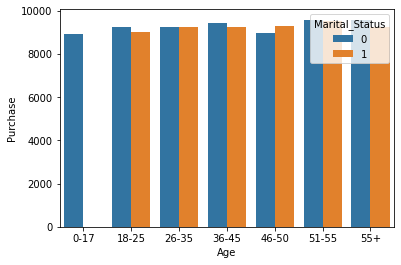

In [ ]:
sns.barplot(data=Purchase_Age_Vs_Gender,x=Purchase_Age_Vs_Gender['Age'],y=Purchase_Age_Vs_Gender['Purchase'],hue=Purchase_Age_Vs_Gender['Marital_Status'])

## Purchasing on Basis of Stay_In_Current_City_Years, City_Category

In [ ]:
Purchase_Cities=df.groupby(['City_Category','Stay_In_Current_City_Years'])['Purchase'].mean().unstack()
Purchase_Cities=round(Purchase_Cities,2)
Purchase_Cities

Stay_In_Current_City_Years,0,1,2,3,4+
City_Category,,,,,
A,8986.59,8878.65,8970.43,8915.04,8830.11
B,8902.62,9178.99,9193.01,9189.99,9192.62
C,9766.97,9647.04,9769.95,9767.69,9736.61



*   Customers from city category C have more purchase than others.
*   Also the customers who stays more than 4 years in city purchase more.
*   Customers who are new to city having less purchase.
*   Customer from B category city have moderate purchase.





In [ ]:
Product_cat=df.groupby(['Product_Category'])['Purchase'].mean()
Product_cat=round(Product_cat,2)
Product_cat=pd.DataFrame(Product_cat).reset_index()

In [ ]:
Product_cat.sort_values(by='Purchase',ascending=False,ignore_index=True)

,Product_Category,Purchase
0,10,19675.57
1,7,16365.69
2,6,15838.48
3,9,15537.38
4,15,14780.45
5,16,14766.04
6,1,13606.22
7,14,13141.63
8,2,11251.94
9,17,10170.76


<Axes: xlabel='Product_Category', ylabel='Purchase'>

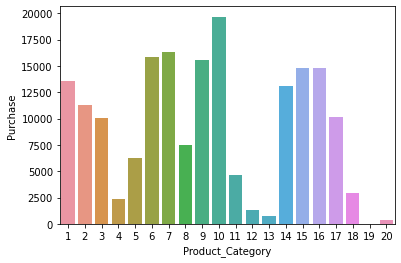

In [ ]:
sns.barplot(data=Product_cat,x='Product_Category',y='Purchase')


*   The frequency of purchasing Product_category 10,7,6,9,15 is more than other product_category.
*   Product of category 13,20,19 have less puchase.



##Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)

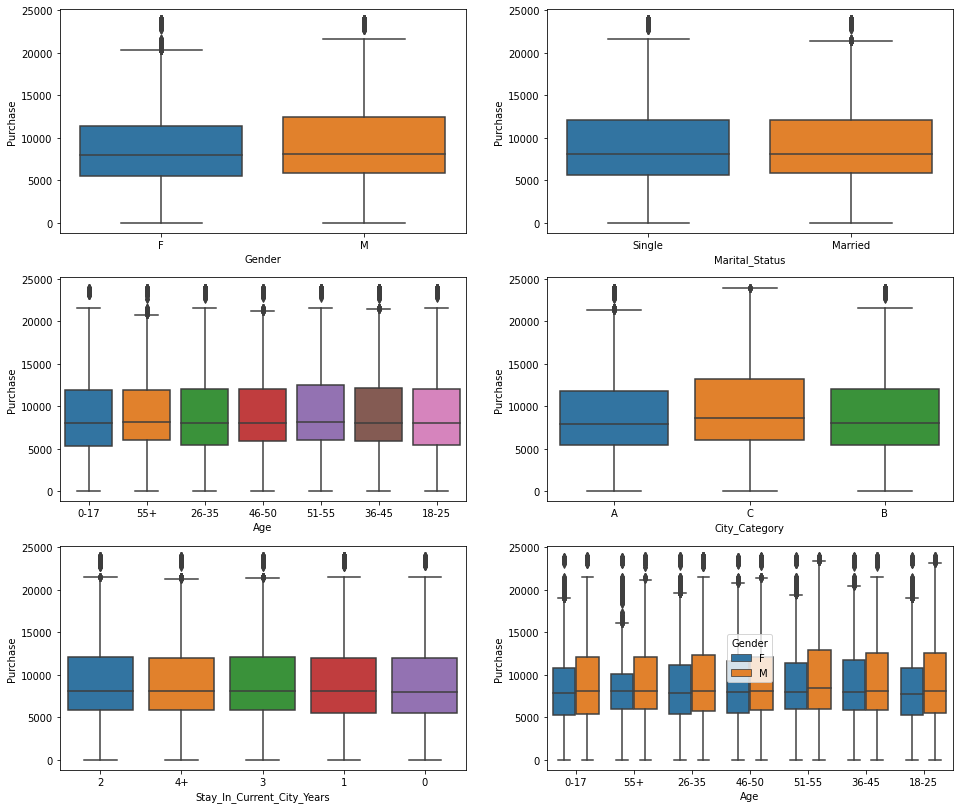

In [ ]:
fig,all_plot=plt.subplots(3,2,figsize=(16,14))
## Outliers in Data
sns.boxplot(data=df,x='Gender',y='Purchase',ax=all_plot[0,0])
sns.boxplot(data=df,x='Marital_Status',y='Purchase',ax=all_plot[0,1])
sns.boxplot(data=df,x='Age',y='Purchase',ax=all_plot[1,0])
sns.boxplot(data=df,x='City_Category',y='Purchase',ax=all_plot[1,1])
sns.boxplot(data=df,x='Stay_In_Current_City_Years',y='Purchase',ax=all_plot[2,0])
sns.boxplot(data=df,hue='Gender',x='Age',y='Purchase',ax=all_plot[2,1])
plt.show()

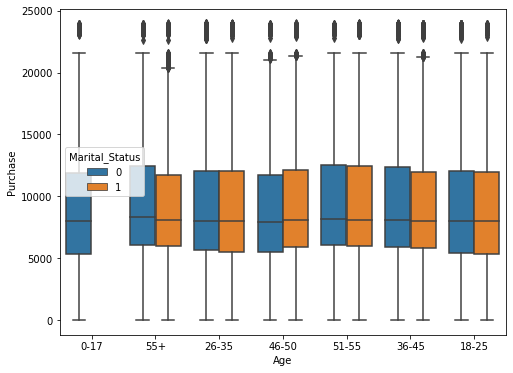

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,hue='Marital_Status',x='Age',y='Purchase')
plt.show()

### Correlation between different variables

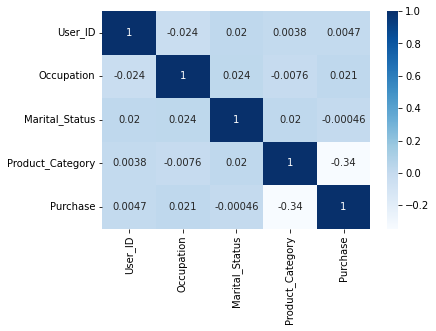

In [ ]:
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

### Visualization by using pair-plot

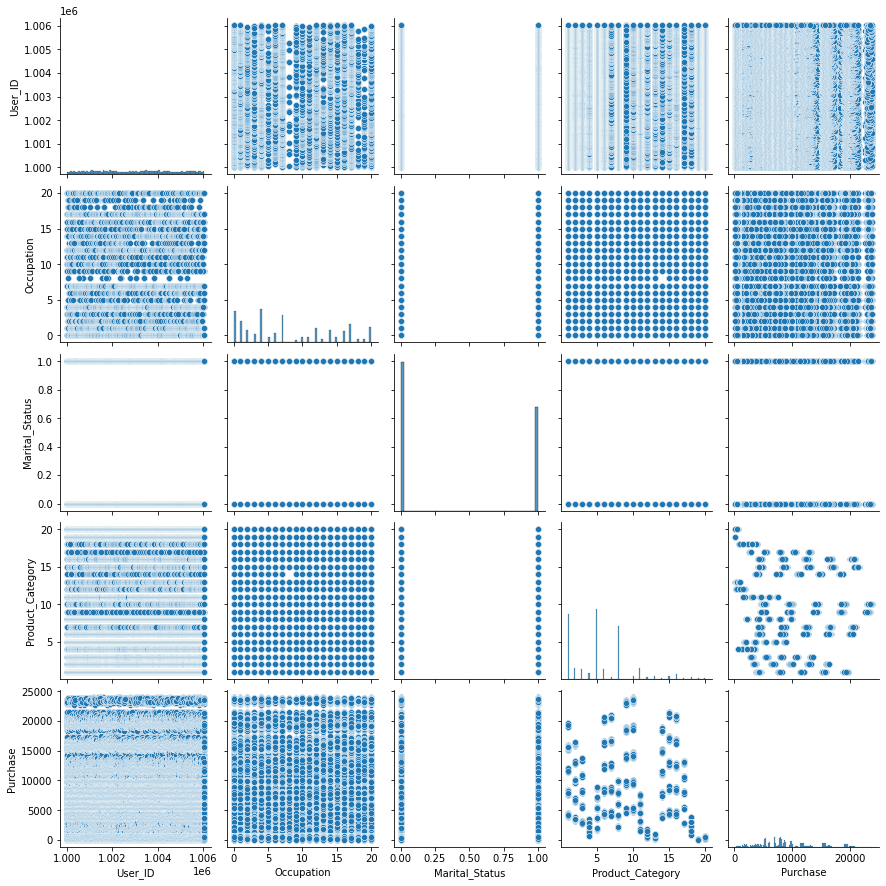

In [ ]:
sns.pairplot(data=df)

# Purchase By Males And Females

In [ ]:
Purchase=df.groupby(['User_ID','Gender'])['Purchase'].sum().reset_index()

In [ ]:
Purchase

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


## Purchase Made by 4225 Males

In [ ]:
Purchase_by_Males=Purchase[Purchase['Gender']=='M']

In [ ]:
len(Purchase_by_Males)

4225

In [ ]:
np.sum(Purchase_by_Males['Purchase'])

3909580100

In [ ]:
Purchase_by_Males.head()

,User_ID,Gender,Purchase
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
6,1000007,M,234668


## Purchase By 1666 Female Customers

In [ ]:
Purchase_by_Females=Purchase[Purchase['Gender']=='F'].reset_index()

In [ ]:
## Number of Female Customer
len(Purchase_by_Females)

1666

In [ ]:
## Total Purchase By Female customers
np.sum(Purchase_by_Females['Purchase'])

1186232642

In [ ]:
Purchase_Mar_Status=df.groupby(['User_ID','Marital_Status'])['Purchase'].sum().reset_index()

In [ ]:
Purchase_by_Females.drop(columns='index',axis=1)

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000006,F,379930
2,1000010,F,2169510
3,1000011,F,557023
4,1000016,F,150490
...,...,...,...
1661,1006035,F,956645
1662,1006036,F,4116058
1663,1006037,F,1119538
1664,1006038,F,90034


In [ ]:
Purchase_Mar_Status

,User_ID,Marital_Status,Purchase
0,1000001,Single,334093
1,1000002,Single,810472
2,1000003,Single,341635
3,1000004,Married,206468
4,1000005,Married,821001
...,...,...,...
5886,1006036,Married,4116058
5887,1006037,Single,1119538
5888,1006038,Single,90034
5889,1006039,Married,590319


## Purchase Made By Single's

In [ ]:
Purchase_By_Single=Purchase_Mar_Status[Purchase_Mar_Status['Marital_Status']=='Single']

In [ ]:
len(Purchase_By_Single)

3417

In [ ]:
np.sum(Purchase_By_Single['Purchase'])

3008927447

## Purchase Made By Couples

In [ ]:
Purchase_By_Couples=Purchase_Mar_Status[Purchase_Mar_Status['Marital_Status']=='Married']

In [ ]:
len(Purchase_By_Couples)

2474

In [ ]:
np.sum(Purchase_By_Couples['Purchase'])

2086885295

### Purchase made by  Male Customers more than Female Customers
*   Total Purchase made by 4225 Males is 3,909,580,100.
*   Total Purchase made by 1666 Females is 1,186,232,642.
### Purchase made by Couples is more than single Customers.
*   Total Purchase made by 3417 Singles is 3,008,927,447.
*   Total Purchase made by 2474 Couples is 2,086,885,295.



# Central Limit Theorem

###Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.

#### CLT Analysis Based on Gender with confidence 90%,95% and 99%.

In [ ]:
male_purchase=df[df['Gender']=='M'].reset_index()


In [ ]:
male_purchase.head()

,index,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969
1,5,1000003,P00193542,M,26-35,15,A,3,Single,1,15227
2,6,1000004,P00184942,M,46-50,7,B,2,Married,1,19215
3,7,1000004,P00346142,M,46-50,7,B,2,Married,1,15854
4,8,1000004,P0097242,M,46-50,7,B,2,Married,1,15686


Text(0, 0.5, 'sample_mean')

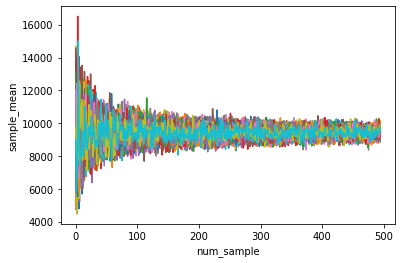

In [ ]:
male_purchase_sample_trend=[]
for i in range(100):
  for num_samples in range(5,500):
    sample=male_purchase['Purchase'].sample(num_samples,replace=True)
    sample_mean=np.mean(sample)
    male_purchase_sample_trend.append(sample_mean)
  plt.plot(male_purchase_sample_trend)
  male_purchase_sample_trend=[]
male_purchase_sample_trend
plt.xlabel('num_sample')
plt.ylabel('sample_mean')

### Sample Mean Trend of Males Expenses

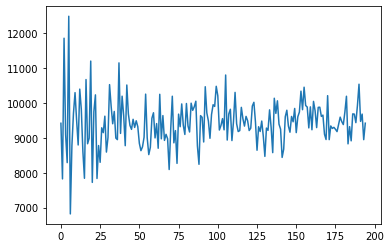

In [ ]:
male_expenses_sample_trend=[]
for num_samples in range(5,200):
  sample=male_purchase['Purchase'].sample(num_samples,replace=True)
  sample_mean=np.mean(sample)
  male_expenses_sample_trend.append(sample_mean)
plt.plot(male_expenses_sample_trend)


### Confidence Interval

<Axes: ylabel='Count'>

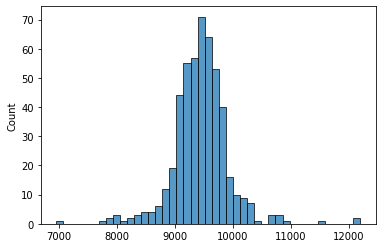

In [ ]:
male_expenses_sample_trend=[]
for num_samples in range(5,500):
  sample=male_purchase['Purchase'].sample(num_samples,replace=True)
  sample_mean=np.mean(sample)
  male_expenses_sample_trend.append(sample_mean)
sns.histplot(male_expenses_sample_trend)

### Calculatinng Male Purchase with 99% confidence with different samples.

In [ ]:
no_of_samples=[10,50,250,500,750,1000]
for sample_size in no_of_samples:
  male_sample_mean_trend=[]
  sample = male_purchase["Purchase"].sample(sample_size, replace=True)
  male_sample_mean = np.mean(sample)
  male_sample_mean_trend.append(male_sample_mean)
  final_mean=np.mean(male_sample_mean_trend)
  error_clt = (2.33*male_purchase['Purchase'].std())/np.sqrt(sample_size)
  lower_limit = final_mean - error_clt
  upper_limit = final_mean + error_clt
  print("confidence interval of {:d} samples: ({:.2f}, {:.2f})".format(int(sample_size),lower_limit, upper_limit))
  print("interval range: ({:.2f})".format(upper_limit-lower_limit))
print(" ")

confidence interval of 10 samples: (6757.82, 14261.78)
interval range: (7503.95)
confidence interval of 50 samples: (6654.40, 10010.28)
interval range: (3355.87)
confidence interval of 250 samples: (9004.78, 10505.58)
interval range: (1500.79)
confidence interval of 500 samples: (8849.80, 9911.02)
interval range: (1061.22)
confidence interval of 750 samples: (8796.95, 9663.43)
interval range: (866.48)
confidence interval of 1000 samples: (9185.24, 9935.63)
interval range: (750.40)
 


### Calculatinng Male Purchase with 95% confidence with different samples.

In [ ]:
no_of_samples=[50,500,1000]
for sample_size in no_of_samples:
  male_sample_mean_trend=[]
  sample = male_purchase["Purchase"].sample(sample_size, replace=True)
  male_sample_mean = np.mean(sample)
  male_sample_mean_trend.append(male_sample_mean)
  final_mean=np.mean(male_sample_mean_trend)
  error_clt = (1.65 * male_purchase['Purchase'].std())/np.sqrt(sample_size)
  lower_limit = final_mean - error_clt
  upper_limit = final_mean + error_clt
  print("confidence interval of {:d} samples: ({:.2f}, {:.2f})".format(int(sample_size),lower_limit, upper_limit))
  print("interval range: ({:.2f})".format(upper_limit-lower_limit))
print(" ")

confidence interval of 50 samples: (8907.06, 11283.54)
interval range: (2376.47)
confidence interval of 500 samples: (8961.19, 9712.70)
interval range: (751.51)
confidence interval of 1000 samples: (9147.74, 9679.13)
interval range: (531.40)
 


###Calculatinng Male Purchase with 90% confidence with different samples.

In [ ]:
no_of_samples=[50,500,1000]
for sample_size in no_of_samples:
  male_sample_mean_trend=[]
  sample = male_purchase["Purchase"].sample(sample_size, replace=True)
  male_sample_mean = np.mean(sample)
  male_sample_mean_trend.append(male_sample_mean)
  final_mean=np.mean(male_sample_mean_trend)
  error_clt = (1.28 * male_purchase['Purchase'].std())/np.sqrt(sample_size)
  lower_limit = final_mean - error_clt
  upper_limit = final_mean + error_clt
  print("confidence interval of {:d} samples: ({:.2f}, {:.2f})".format(int(sample_size),lower_limit, upper_limit))
  print("interval range: ({:.2f})".format(upper_limit-lower_limit))
print(" ")

confidence interval of 50 samples: (7914.72, 9758.28)
interval range: (1843.57)
confidence interval of 500 samples: (9118.24, 9701.23)
interval range: (582.99)
confidence interval of 1000 samples: (9507.21, 9919.45)
interval range: (412.23)
 


###Calculatinng Females Purchase with 99% confidence with different samples.


In [ ]:
female_purchase=df[df['Gender']=='F'].reset_index()


Text(0, 0.5, 'sample_mean')

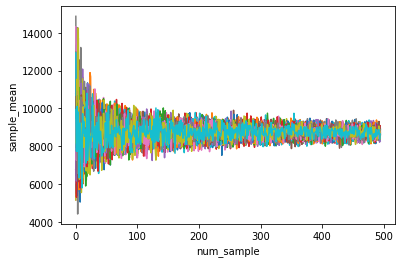

In [ ]:
female_purchase_sample_trend=[]
for i in range(50):
  for num_samples in range(5,500):
    sample=female_purchase['Purchase'].sample(num_samples,replace=True)
    sample_mean=np.mean(sample)
    female_purchase_sample_trend.append(sample_mean)
  plt.plot(female_purchase_sample_trend)
  female_purchase_sample_trend=[]
female_purchase_sample_trend
plt.xlabel('num_sample')
plt.ylabel('sample_mean')

### Sample Mean Trend of Females Expenses

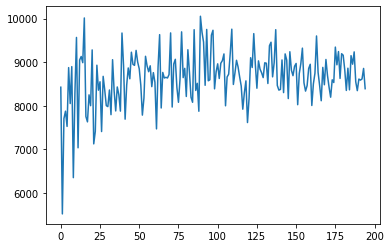

In [ ]:
female_expenses_sample_trend=[]
for num_samples in range(5,200):
  sample=female_purchase['Purchase'].sample(num_samples,replace=True)
  sample_mean=np.mean(sample)
  female_expenses_sample_trend.append(sample_mean)
plt.plot(female_expenses_sample_trend)


### Confidence Interval

<Axes: ylabel='Count'>

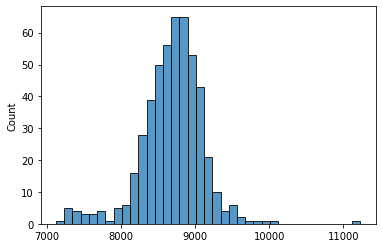

In [ ]:
female_expenses_sample_trend=[]
for num_samples in range(5,500):
  sample=female_purchase['Purchase'].sample(num_samples,replace=True)
  sample_mean=np.mean(sample)
  female_expenses_sample_trend.append(sample_mean)
sns.histplot(female_expenses_sample_trend)

### 99 % Confidence for different samples

In [ ]:
no_of_samples=[10,50,250,500,750,1000]
for sample_size in no_of_samples:
  female_sample_mean_trend=[]
  sample = male_purchase["Purchase"].sample(sample_size, replace=True)
  male_sample_mean = np.mean(sample)
  female_sample_mean_trend.append(male_sample_mean)
  final_mean=np.mean(female_sample_mean_trend)
  error_clt = (2.33*male_purchase['Purchase'].std())/np.sqrt(sample_size)
  lower_limit = final_mean - error_clt
  upper_limit = final_mean + error_clt
  print("confidence interval of {:d} samples: ({:.2f}, {:.2f})".format(int(sample_size),lower_limit, upper_limit))
  print("interval range: ({:.2f})".format(upper_limit-lower_limit))
print(" ")

confidence interval of 10 samples: (5548.62, 13052.58)
interval range: (7503.95)
confidence interval of 50 samples: (7270.38, 10626.26)
interval range: (3355.87)
confidence interval of 250 samples: (8307.31, 9808.10)
interval range: (1500.79)
confidence interval of 500 samples: (8649.62, 9710.84)
interval range: (1061.22)
confidence interval of 750 samples: (8977.90, 9844.39)
interval range: (866.48)
confidence interval of 1000 samples: (9043.71, 9794.11)
interval range: (750.40)
 


### 95 % of Confidence

In [ ]:
no_of_samples=[50,500,1000]
for sample_size in no_of_samples:
  female_sample_mean_trend=[]
  sample = male_purchase["Purchase"].sample(sample_size, replace=True)
  male_sample_mean = np.mean(sample)
  female_sample_mean_trend.append(male_sample_mean)
  final_mean=np.mean(female_sample_mean_trend)
  error_clt = (1.65*male_purchase['Purchase'].std())/np.sqrt(sample_size)
  lower_limit = final_mean - error_clt
  upper_limit = final_mean + error_clt
  print("confidence interval of {:d} samples: ({:.2f}, {:.2f})".format(int(sample_size),lower_limit, upper_limit))
  print("interval range: ({:.2f})".format(upper_limit-lower_limit))
print(" ")

confidence interval of 50 samples: (8639.62, 11016.10)
interval range: (2376.47)
confidence interval of 500 samples: (9145.69, 9897.20)
interval range: (751.51)
confidence interval of 1000 samples: (9170.37, 9701.77)
interval range: (531.40)
 


### 90% of confidence

In [ ]:
no_of_samples=[50,500,1000]
for sample_size in no_of_samples:
  female_sample_mean_trend=[]
  sample = male_purchase["Purchase"].sample(sample_size, replace=True)
  male_sample_mean = np.mean(sample)
  female_sample_mean_trend.append(male_sample_mean)
  final_mean=np.mean(female_sample_mean_trend)
  error_clt = (1.28 * male_purchase['Purchase'].std())/np.sqrt(sample_size)
  lower_limit = final_mean - error_clt
  upper_limit = final_mean + error_clt
  print("confidence interval of {:d} samples: ({:.2f}, {:.2f})".format(int(sample_size),lower_limit, upper_limit))
  print("interval range: ({:.2f})".format(upper_limit-lower_limit))
print(" ")

confidence interval of 50 samples: (8139.66, 9983.22)
interval range: (1843.57)
confidence interval of 500 samples: (8997.50, 9580.49)
interval range: (582.99)
confidence interval of 1000 samples: (9169.20, 9581.43)
interval range: (412.23)
 


At 99 % --> confidence interval for Male Expenses of 1000 samples: (9185.24, 9935.63)
interval range: (750.40)

At 99% --> confidence interval for Female Expenses of 1000 samples: (9043.71, 9794.11)
interval range: (750.40)

At 95% --> confidence interval for Male Expenses of 1000 samples: (9147.74, 9679.13)
interval range: (531.40)

At 95% --> confidence interval for Female Expenses of 1000 samples: (9170.37, 9701.77)
interval range: (531.40)

At 90% --> confidence interval for Male Expenses of 1000 samples: (9507.21, 9919.45)
interval range: (412.23)

At 90% --> confidence interval for Female Expensesof 1000 samples: (9169.20, 9581.43)
interval range: (412.23)

# Simialrly for Married and Un-married Customers

In [ ]:
single_customers = df[df['Marital_Status']=='Single']
married_customers = df[df['Marital_Status']=='Married']

### 99% of Confedence

In [ ]:
no_of_samples=[1000]
for sample_size in no_of_samples:
  singles_sample_mean_trend=[]
  sample = single_customers["Purchase"].sample(sample_size, replace=True)
  singles_sample_mean = np.mean(sample)
  singles_sample_mean_trend.append(singles_sample_mean)
  final_mean=np.mean(singles_sample_mean_trend)
  error_clt = (2.33*single_customers['Purchase'].std())/np.sqrt(sample_size)
  lower_limit = final_mean - error_clt
  upper_limit = final_mean + error_clt
  print("confidence interval of {:d} samples: ({:.2f}, {:.2f})".format(int(sample_size),lower_limit, upper_limit))
  print("interval range: ({:.2f})".format(upper_limit-lower_limit))
print(" ")

## For Married Customers
no_of_samples=[1000]
for sample_size in no_of_samples:
  married_sample_mean_trend=[]
  sample = married_customers["Purchase"].sample(sample_size, replace=True)
  married_sample_mean = np.mean(sample)
  married_sample_mean_trend.append(married_sample_mean)
  final_mean=np.mean(married_sample_mean_trend)
  error_clt = (2.33*married_customers['Purchase'].std())/np.sqrt(sample_size)
  lower_limit = final_mean - error_clt
  upper_limit = final_mean + error_clt
  print("confidence interval of {:d} samples for married customers: ({:.2f}, {:.2f})".format(int(sample_size),lower_limit, upper_limit))
  print("interval range married customers: ({:.2f})".format(upper_limit-lower_limit))

confidence interval of 1000 samples: (8865.41, 9606.25)
interval range: (740.84)
 
confidence interval of 1000 samples for married customers: (8974.45, 9713.75)
interval range married customers: (739.30)


### 95 % of Confidence

In [ ]:
no_of_samples=[1000]
for sample_size in no_of_samples:
  singles_sample_mean_trend=[]
  sample = single_customers["Purchase"].sample(sample_size, replace=True)
  singles_sample_mean = np.mean(sample)
  singles_sample_mean_trend.append(singles_sample_mean)
  final_mean=np.mean(singles_sample_mean_trend)
  error_clt = (1.65 * single_customers['Purchase'].std())/np.sqrt(sample_size)
  lower_limit = final_mean - error_clt
  upper_limit = final_mean + error_clt
  print("confidence interval of {:d} samples: ({:.2f}, {:.2f})".format(int(sample_size),lower_limit, upper_limit))
  print("interval range: ({:.2f})".format(upper_limit-lower_limit))
print(" ")

## For Married Customers
no_of_samples=[1000]
for sample_size in no_of_samples:
  married_sample_mean_trend=[]
  sample = married_customers["Purchase"].sample(sample_size, replace=True)
  married_sample_mean = np.mean(sample)
  married_sample_mean_trend.append(married_sample_mean)
  final_mean=np.mean(married_sample_mean_trend)
  error_clt = (1.65 * married_customers['Purchase'].std())/np.sqrt(sample_size)
  lower_limit = final_mean - error_clt
  upper_limit = final_mean + error_clt
  print("confidence interval of {:d} samples for married customers: ({:.2f}, {:.2f})".format(int(sample_size),lower_limit, upper_limit))
  print("interval range married customers: ({:.2f})".format(upper_limit-lower_limit))


confidence interval of 1000 samples: (8852.37, 9377.00)
interval range: (524.63)
 
confidence interval of 1000 samples for married customers: (9007.08, 9530.61)
interval range married customers: (523.54)


### 90 % of Confidence

In [ ]:
no_of_samples=[1000]
for sample_size in no_of_samples:
  singles_sample_mean_trend=[]
  sample = single_customers["Purchase"].sample(sample_size, replace=True)
  singles_sample_mean = np.mean(sample)
  singles_sample_mean_trend.append(singles_sample_mean)
  final_mean=np.mean(singles_sample_mean_trend)
  error_ = (1.28 * single_customers['Purchase'].std())/np.sqrt(sample_size)
  lower_limit = final_mean - error_
  upper_limit = final_mean + error_
  print("confidence interval of {:d} samples: ({:.2f}, {:.2f})".format(int(sample_size),lower_limit, upper_limit))
  print("interval range: ({:.2f})".format(upper_limit-lower_limit))
print(" ")

## For Married Customers
no_of_samples=[1000]
for sample_size in no_of_samples:
  married_sample_mean_trend=[]
  sample = married_customers["Purchase"].sample(sample_size, replace=True)
  married_sample_mean = np.mean(sample)
  married_sample_mean_trend.append(married_sample_mean)
  final_mean=np.mean(married_sample_mean_trend)
  error_ = (1.28 * married_customers['Purchase'].std())/np.sqrt(sample_size)
  lower_limit = final_mean - error_
  upper_limit = final_mean + error_
  print("confidence interval of {:d} samples for married customers: ({:.2f}, {:.2f})".format(int(sample_size),lower_limit, upper_limit))
  print("interval range married customers: ({:.2f})".format(upper_limit-lower_limit))

confidence interval of 1000 samples: (9072.46, 9479.45)
interval range: (406.99)
 
confidence interval of 1000 samples for married customers: (9252.01, 9658.15)
interval range married customers: (406.14)


At 99 % ---> confidence interval of 1000 samples for married customers: (8974.45, 9713.75)

interval range married customers: (739.30)

At 95 % ---> confidence interval of 1000 samples for married customers: (9007.08, 9530.61)

interval range married customers: (523.54)

At 90 % ---> confidence interval of 1000 samples for married customers: (9252.01, 9658.15)

interval range married customers: (406.14)

#Simialrly for different age groups

In [ ]:
age_purchase = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
age_purchase = age_purchase.reset_index()


### 99% Confidence

In [ ]:
sample_means = {}         ## Create a dictionary having age as key and value is sample purchase means
age_intervals = [ '0-17', '26-35', '36-45', '18-25', '46-50', '51-55', '55+']
for ages in age_intervals:
  sample_means[ages] = []

for ages in age_intervals :
  for i in range (200):
    mean_ages = df[df['Age']==ages].sample(10, replace=True)['Purchase'].mean()
    sample_means[ages].append(mean_ages)

for i in ([ '0-17', '26-35', '36-45', '18-25', '46-50', '51-55', '55+']):
  age_data = df[df['Age']==i]
  error_ = 2.33*df['Purchase'].std()/np.sqrt(1000)
  mean_ = np.mean(sample_means[i])
  lower_limit = (mean_ - error_)
  upper_limit = (mean_ + error_)

  print("For age_group {} confidence interval: ({:.0f}, {:.0f})".format(i, lower_limit, upper_limit))

For age_group 0-17 confidence interval: (8693, 9433)
For age_group 26-35 confidence interval: (8916, 9656)
For age_group 36-45 confidence interval: (8950, 9690)
For age_group 18-25 confidence interval: (8617, 9357)
For age_group 46-50 confidence interval: (9111, 9851)
For age_group 51-55 confidence interval: (9267, 10007)
For age_group 55+ confidence interval: (8805, 9546)


### 95% Confidence

In [ ]:
sample_means = {}         ## Create a dictionary having age as key and value is sample purchase means
age_intervals = [ '0-17', '26-35', '36-45', '18-25', '46-50', '51-55', '55+']
for ages in age_intervals:
  sample_means[ages] = []

for ages in age_intervals :
  for i in range (200):
    mean_ages = df[df['Age']==ages].sample(10, replace=True)['Purchase'].mean()
    sample_means[ages].append(mean_ages)

for i in ([ '0-17', '26-35', '36-45', '18-25', '46-50', '51-55', '55+']):
  age_data = df[df['Age']==i]
  error_ = 1.65*df['Purchase'].std()/np.sqrt(1000)
  mean_ = np.mean(sample_means[i])
  lower_limit = (mean_ - error_)
  upper_limit = (mean_ + error_)

  print("For age_group {} confidence interval: ({:.0f}, {:.0f})".format(i, lower_limit, upper_limit))

For age_group 0-17 confidence interval: (8620, 9144)
For age_group 26-35 confidence interval: (8995, 9519)
For age_group 36-45 confidence interval: (9083, 9607)
For age_group 18-25 confidence interval: (8726, 9250)
For age_group 46-50 confidence interval: (9029, 9554)
For age_group 51-55 confidence interval: (9263, 9787)
For age_group 55+ confidence interval: (8958, 9482)


### 90% Confidence

In [ ]:
sample_means = {}         ## Create a dictionary having age as key and value is sample purchase means
age_intervals = [ '0-17', '26-35', '36-45', '18-25', '46-50', '51-55', '55+']
for ages in age_intervals:
  sample_means[ages] = []

for ages in age_intervals :
  for i in range (200):
    mean_ages = df[df['Age']==ages].sample(10, replace=True)['Purchase'].mean()
    sample_means[ages].append(mean_ages)

for i in ([ '0-17', '26-35', '36-45', '18-25', '46-50', '51-55', '55+']):
  age_data = df[df['Age']==i]
  error_ = 1.28*df['Purchase'].std()/np.sqrt(1000)
  mean_ = np.mean(sample_means[i])
  lower_limit = (mean_ - error_)
  upper_limit = (mean_ + error_)

  print("For age_group {} confidence interval: ({:.0f}, {:.0f})".format(i, lower_limit, upper_limit))

For age_group 0-17 confidence interval: (8673, 9080)
For age_group 26-35 confidence interval: (8977, 9384)
For age_group 36-45 confidence interval: (9158, 9565)
For age_group 18-25 confidence interval: (9179, 9586)
For age_group 46-50 confidence interval: (9060, 9467)
For age_group 51-55 confidence interval: (9362, 9769)
For age_group 55+ confidence interval: (9134, 9541)


### ***At 99% for different age groups interval range ***
  For age_group 0-17 confidence interval: (8693, 9433)

  For age_group 26-35 confidence interval: (8916, 9656)

  For age_group 36-45 confidence interval: (8950, 9690)

  For age_group 18-25 confidence interval: (8617, 9357)

  For age_group 46-50 confidence interval: (9111, 9851)

  For age_group 51-55 confidence interval: (9267, 10007)

  For age_group 55+ confidence interval: (8805, 9546)

### ***At 95% for different age groups interval range ***  
  For age_group 0-17 confidence interval: (8620, 9144)

  For age_group 26-35 confidence interval: (8995, 9519)

  For age_group 36-45 confidence interval: (9083, 9607)

  For age_group 18-25 confidence interval: (8726, 9250)

  For age_group 46-50 confidence interval: (9029, 9554)

  For age_group 51-55 confidence interval: (9263, 9787)

  For age_group 55+ confidence interval: (8958, 9482)

### ***At 90% for different age groups interval range ***
  For age_group 0-17 confidence interval: (8673, 9080)

  For age_group 26-35 confidence interval: (8977, 9384)

  For age_group 36-45 confidence interval: (9158, 9565)

  For age_group 18-25 confidence interval: (9179, 9586)

  For age_group 46-50 confidence interval: (9060, 9467)

  For age_group 51-55 confidence interval: (9362, 9769)
  
  For age_group 55+ confidence interval: (9134, 9541)

# Recommondations



1.   Males are purchasing more than females in order to purchase more by females Wallmart need to focus on campaining and providing offers and discounts to female customer.
2.   0-17 Age group have less purchase. Wallmart need to focus on this age group by offering discounts, cashback offers, rewards and gifts.

3.   Singles are purchasing more than couples. Wallmart need to focus on how couples purchase more by offering flash sell, promotions, some events for couples.

4.   Customers from city category A and B have less purhase. Wallmart need to manage some promotions, events in these cities. Also focus on advertising by newspaper, mass massaging, social media campaining.

5.   As there are 9 product category whos purchase is less than 10000. So Wallmart need to take action to improve sell of these product categories by advertising, affiliate marketing and by giving cashback offers,gift vouchers..



********************************************************************************

---

